<a href="https://colab.research.google.com/github/Artin-Tavasoli/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
   <font size="+3">🧠 Clustering</font>
</p>

<p align="center">
  <font size="+2">Artin Tavasoli 👋🏻</font>
</p>
<p align="center">
  <font size="+2">📘 Student ID: 810102543</font>
</p>

* * *

  <font size="+2">Overview</font>

  Clustering is an unsupervised machine learning technique used to group similar data points together based on their inherent characteristics. We will explore various clustering methods, including Hierarchical Clustering, DBSCAN, and K-Means, applied to a music lyrics dataset.


Replace the placeholder URL below with the raw GitHub URL of your CSV file.

## 📚 Import Needed Libraries


In [34]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


## ⏳ Load Dataset

In [35]:
dataset_url = 'https://raw.githubusercontent.com/Artin-Tavasoli/Clustering/refs/heads/main/musicLyrics.csv'
music_df = pd.read_csv(dataset_url)
print("dataset file loaded successfully!")
display(music_df.head())

dataset file loaded successfully!


,Lyric
0,Cryptic psalms Amidst the howling winds A scor...
1,Im sleeping tonight with all the wolves Were d...
2,Wings of the darkest descent Fall from the rea...
3,[Verse 1] Norrid Radd was my real name Had a j...
4,Deep in the dungeons of doom and despair Sneak...


# 📤 Data Preprocessing

Why is this step necessary for a text dataset?

- Reducing Noise and Irrelevance:  Removing punctuation, special characters and stop words helps to focus on the meaningful content.

- Handling Variations: reduce variations to a common base form

- Normalizing Format: Converting text to a consistent format


Steps:

- Convert to lowercase
- Remove non-word characters
- Remove extra spaces
- Remove brackets in the dataset like [Verse 1], [Intro], [Hook] , ...
  
  Ultimately, I chose not to remove brackets, because the clusters became harder to distinguish, likely because one type of music only used this
  ( probably rap music :) ) and so it was an important peace of information
  for this class and we must not delete it.
- Tokenize text
- Remove stop words like "a", "an", "the", ...

In [36]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_brackets(text):
    return re.sub(r'\[.*?\]', '', text)

def remove_stopwords_and_clean(text):
    # Remove brackets first
    #text = remove_brackets(text)
    # Convert to lowercase
    text = text.lower()
    # Remove non-word characters
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)


music_df['Lyric_cleaned'] = music_df['Lyric'].apply(remove_stopwords_and_clean)

display(music_df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Lyric,Lyric_cleaned
0,Cryptic psalms Amidst the howling winds A scor...,cryptic psalms amidst howling winds scorching ...
1,Im sleeping tonight with all the wolves Were d...,im sleeping tonight wolves dreaming life thats...
2,Wings of the darkest descent Fall from the rea...,wings darkest descent fall realm dark blackest...
3,[Verse 1] Norrid Radd was my real name Had a j...,verse norrid radd real name job hated every da...
4,Deep in the dungeons of doom and despair Sneak...,deep dungeons doom despair sneak place dark ek...


### Lemmatization vs Stemming

Both are techniques used in natural language processing to normalize text by reducing words to their base or root form.

- Stemming

 it's a cruder process that chops off the ends of words to arrive at a common "stem." The stem may not be a linguistically correct word. For example, it might remove "ing," "ed," or "s" from words. This method is faster than Lemmatization.

-  Lemmatization:
 it's a more sophisticated process that reduces words to their base or dictionary form. For example, the lemma of "running," "ran," and "runner" would be "run.

#### Which is better here?

both methods are provided below, let us compare the Silhouette Score of K Means Method:

Lemmatization: 0.07143732160329819

Stemming: 0.06813081353902817

This method of score is explained below, but for now, Lemmatization resulted in a slightly better Silhouette Score.

In [37]:
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

In [38]:
music_df['Lyric_tokens'] = music_df['Lyric_cleaned'].apply(word_tokenize)

music_df['Lyric_stemmed'] = music_df['Lyric_tokens'].apply(stem_text)


WordNetLemmatizer().lemmatize('test')
music_df['Lyric_lemmatized'] = music_df['Lyric_tokens'].apply(lemmatize_text)

display(music_df.head())

,Lyric,Lyric_cleaned,Lyric_tokens,Lyric_stemmed,Lyric_lemmatized
0,Cryptic psalms Amidst the howling winds A scor...,cryptic psalms amidst howling winds scorching ...,"[cryptic, psalms, amidst, howling, winds, scor...","[cryptic, psalm, amidst, howl, wind, scorch, s...","[cryptic, psalm, amidst, howling, wind, scorch..."
1,Im sleeping tonight with all the wolves Were d...,im sleeping tonight wolves dreaming life thats...,"[im, sleeping, tonight, wolves, dreaming, life...","[im, sleep, tonight, wolv, dream, life, that, ...","[im, sleeping, tonight, wolf, dreaming, life, ..."
2,Wings of the darkest descent Fall from the rea...,wings darkest descent fall realm dark blackest...,"[wings, darkest, descent, fall, realm, dark, b...","[wing, darkest, descent, fall, realm, dark, bl...","[wing, darkest, descent, fall, realm, dark, bl..."
3,[Verse 1] Norrid Radd was my real name Had a j...,verse norrid radd real name job hated every da...,"[verse, norrid, radd, real, name, job, hated, ...","[vers, norrid, radd, real, name, job, hate, ev...","[verse, norrid, radd, real, name, job, hated, ..."
4,Deep in the dungeons of doom and despair Sneak...,deep dungeons doom despair sneak place dark ek...,"[deep, dungeons, doom, despair, sneak, place, ...","[deep, dungeon, doom, despair, sneak, place, d...","[deep, dungeon, doom, despair, sneak, place, d..."


## Extract Features

What is the purpose of this step?

- ML Models Don't Understand Text Directly: they require numerical input

- Features Capture the Meaning And Contex

- High Dimensionality of Text


In [39]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# to use stemming method, uncomment below and comment Lyric_lemmatized method.
# embeddings = model.encode(music_df['Lyric_stemmed'], show_progress_bar=True)

embeddings = model.encode(music_df['Lyric_lemmatized'], show_progress_bar=True)

embeddings = np.array(embeddings)

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

# Clustering
## KMeans

Find the optimal number of clusters(K) using elbow method

Inertia is a metric that measures the sum of squared distances of samples to their closest cluster center.

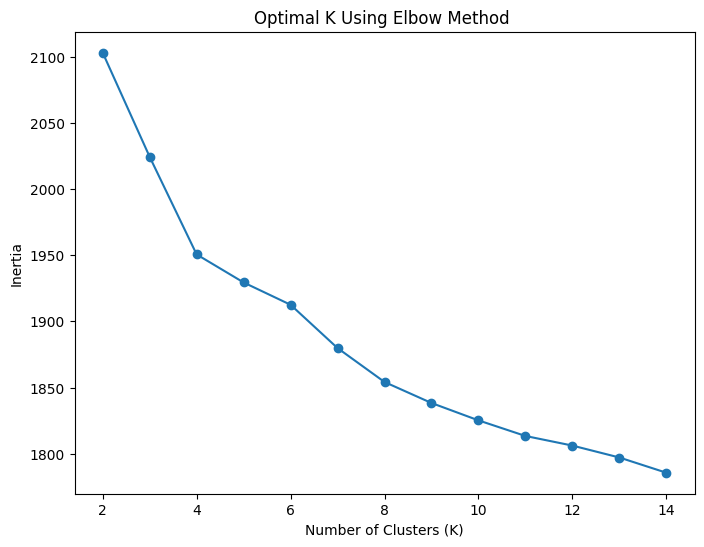

In [40]:
inertia = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Optimal K Using Elbow Method ')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [41]:
optimal_k = 4 # based on elbow method above
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
music_df['cluster_with_kmeans'] = kmeans.fit_predict(embeddings)
print(music_df.head())

                                               Lyric  \
0  Cryptic psalms Amidst the howling winds A scor...   
1  Im sleeping tonight with all the wolves Were d...   
2  Wings of the darkest descent Fall from the rea...   
3  [Verse 1] Norrid Radd was my real name Had a j...   
4  Deep in the dungeons of doom and despair Sneak...   

                                       Lyric_cleaned  \
0  cryptic psalms amidst howling winds scorching ...   
1  im sleeping tonight wolves dreaming life thats...   
2  wings darkest descent fall realm dark blackest...   
3  verse norrid radd real name job hated every da...   
4  deep dungeons doom despair sneak place dark ek...   

                                        Lyric_tokens  \
0  [cryptic, psalms, amidst, howling, winds, scor...   
1  [im, sleeping, tonight, wolves, dreaming, life...   
2  [wings, darkest, descent, fall, realm, dark, b...   
3  [verse, norrid, radd, real, name, job, hated, ...   
4  [deep, dungeons, doom, despair, sneak, plac

### K-Means Silhouette Score

In [42]:
score = silhouette_score(embeddings, music_df['cluster_with_kmeans'])
print(f"K-Means Silhouette Score: {score}")

K-Means Silhouette Score: 0.07143732160329819
